<a href="https://colab.research.google.com/github/MudassirABBASSi/Recommendation-System-/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
df_m = pd.read_csv('/content/Movies.csv')
df_r = pd.read_csv('/content/Ratings.csv')

In [10]:
df_m

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [11]:
df_r

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [12]:
df = pd.merge(df_m,df_r,on ='movieId')

In [13]:
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091
...,...,...,...,...,...,...
99999,161944,The Last Brickmaker in America (2001),Drama,287,5.0,1470167824
100000,162376,Stranger Things,Drama,73,4.5,1474255532
100001,162542,Rustom (2016),Romance|Thriller,611,5.0,1471520667
100002,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,611,3.0,1471523986


#Popularity base Recommendation System (Finding the top 10 Movies)
**Criteria**
1. Movie with high rating
2.Number of view

# Average Rating of movie

In [14]:
df.groupby('title')['rating'].mean().head(10)

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000
'Salem's Lot (2004),3.500000
'Til There Was You (1997),2.625000
"'burbs, The (1989)",3.052632
'night Mother (1986),5.000000


In [15]:
df.groupby('title')['rating'].mean().sort_values(ascending= False).head(5)

,rating
title,
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973),5.0
Alien Escape (1995),5.0
Boiling Point (1993),5.0
Bone Tomahawk (2015),5.0
Borgman (2013),5.0


In [16]:
df.groupby('title')['rating'].mean().sort_values(ascending=True).head(5)

,rating
title,
"Giant Mechanical Man, The (2012)",0.5
Roadkill (a.k.a. Roadkill: Move or Die) (1989),0.5
Road Games (a.k.a. Roadgames) (1981),0.5
Beverly Hills Chihuahua (2008),0.5
"End of Summer, The (Early Autumn) (Kohayagawa-ke no aki) (1961)",0.5


# Number of View of each movies

In [17]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(20)

,rating
title,
Forrest Gump (1994),341
Pulp Fiction (1994),324
"Shawshank Redemption, The (1994)",311
"Silence of the Lambs, The (1991)",304
Star Wars: Episode IV - A New Hope (1977),291
Jurassic Park (1993),274
"Matrix, The (1999)",259
Toy Story (1995),247
Schindler's List (1993),244


In [18]:
df[['title', 'rating']]

,title,rating
0,Toy Story (1995),3.0
1,Toy Story (1995),4.0
2,Toy Story (1995),5.0
3,Toy Story (1995),2.0
4,Toy Story (1995),3.0
...,...,...
99999,The Last Brickmaker in America (2001),5.0
100000,Stranger Things,4.5
100001,Rustom (2016),5.0
100002,Mohenjo Daro (2016),3.0


In [19]:
Mname_rating_counts = pd.DataFrame(df.groupby('title')['rating'].mean())
Mname_rating_counts

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000
...,...
xXx (2002),2.478261
xXx: State of the Union (2005),1.000000
¡Three Amigos! (1986),3.258065


In [20]:
Mname_rating_counts['rating_counts'] = df.groupby('title')['rating'].count()
Mname_rating_counts

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2
...,...,...
xXx (2002),2.478261,23
xXx: State of the Union (2005),1.000000,1
¡Three Amigos! (1986),3.258065,31


In [21]:
Mname_rating_counts['rating'] = Mname_rating_counts['rating'].round(1)

In [22]:
Mname_rating_counts

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",1.8,2
$9.99 (2008),3.8,3
'Hellboy': The Seeds of Creation (2004),2.0,1
'Neath the Arizona Skies (1934),0.5,1
'Round Midnight (1986),2.2,2
...,...,...
xXx (2002),2.5,23
xXx: State of the Union (2005),1.0,1
¡Three Amigos! (1986),3.3,31


#Get the rating greater then 3 and Number of view >100

In [23]:
Mname_rating_counts[(Mname_rating_counts['rating']>4)&(Mname_rating_counts['rating_counts']>100)].head(10)

,rating,rating_counts
title,,
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",4.1,125
American Beauty (1999),4.2,220
Apocalypse Now (1979),4.1,112
Casablanca (1942),4.2,117
"Dark Knight, The (2008)",4.2,121
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),4.2,105
Eternal Sunshine of the Spotless Mind (2004),4.1,106
Fargo (1996),4.3,224
Fight Club (1999),4.2,202


In [24]:
Mname_rating_counts.sort_values(by ='rating_counts',ascending=False).head(6)

,rating,rating_counts
title,,
Forrest Gump (1994),4.1,341
Pulp Fiction (1994),4.3,324
"Shawshank Redemption, The (1994)",4.5,311
"Silence of the Lambs, The (1991)",4.1,304
Star Wars: Episode IV - A New Hope (1977),4.2,291
Jurassic Park (1993),3.7,274


# Content Base Recommendation System
**we will find out content base by using cosain similarity**
the value of cosain simplirity lies between 0 and 1
zero mean no similarity and 1 mean similarity

**formula**

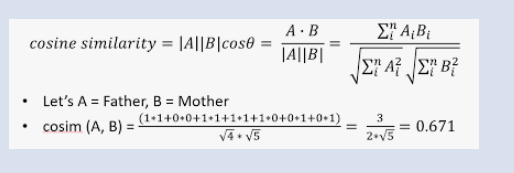

In [25]:
from math import*
def seq_root(x):
 return round(sqrt(sum([a*a for a in x ])),3)

def cosine_similarity(x,y):
  numator = sum(a*b for a,b in zip(x,y))
  denumator = seq_root(x)*seq_root(y)
  return round(numator/float(denumator),3)


In [26]:
print (cosine_similarity([0,45,7,2],[2,54,13,15]))

0.972


### **working method**

**1.Document term frequency**

Document term frequency is same as we find out the number of the words in the sentnce repeated words will be counts in the same column

Dcoumnet  = this is life is

term frequency  = this is life

                  1    2   1

  after this we will find ratio (word_count/total number of words)                

**2.find out cosine similarity**

# code of Content Base Recommendation

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


In [28]:
# # Create the Kaggle directory and copy your kaggle.json file there
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

# # Set permissions for the kaggle.json file (optional, but recommended)
# !chmod 600 ~/.kaggle/kaggle.json

# # Download "The Movies Dataset" from Kaggle using its dataset identifier
# !kaggle datasets download -d rounakbanik/the-movies-dataset

# # Extract the downloaded ZIP file into the /content directory
# import zipfile

# zip_ref = zipfile.ZipFile('/content/the-movies-dataset.zip', 'r')
# zip_ref.extractall('/content')
# zip_ref.close()


In [29]:
df1 = pd.read_csv('/content/Movies.csv')


In [30]:
df1

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [31]:
df = df1[['title', 'genres']]

In [32]:
df

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy
...,...,...
9120,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,The Gay Desperado (1936),Comedy


In [33]:
# prompt: def split_genres(genres_str):
#     return ','.join(genres_str.split('|')) one line code dont wriet thw function

df['genres'] = df['genres'].apply(lambda x: ','.join(x.split('|')))
df['genres'] = df['genres'].apply(lambda x: x.lower().split('|'))
df['title'] = df['title'].apply(lambda x:x.lower())

<ipython-input-33-59291962d928>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'] = df['genres'].apply(lambda x: ','.join(x.split('|')))
<ipython-input-33-59291962d928>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'] = df['genres'].apply(lambda x: x.lower().split('|'))
<ipython-input-33-59291962d928>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [34]:
df

,title,genres
0,toy story (1995),"[adventure,animation,children,comedy,fantasy]"
1,jumanji (1995),"[adventure,children,fantasy]"
2,grumpier old men (1995),"[comedy,romance]"
3,waiting to exhale (1995),"[comedy,drama,romance]"
4,father of the bride part ii (1995),[comedy]
...,...,...
9120,mohenjo daro (2016),"[adventure,drama,romance]"
9121,shin godzilla (2016),"[action,adventure,fantasy,sci-fi]"
9122,the beatles: eight days a week - the touring y...,[documentary]
9123,the gay desperado (1936),[comedy]


In [35]:
df['title']

,title
0,toy story (1995)
1,jumanji (1995)
2,grumpier old men (1995)
3,waiting to exhale (1995)
4,father of the bride part ii (1995)
...,...
9120,mohenjo daro (2016)
9121,shin godzilla (2016)
9122,the beatles: eight days a week - the touring y...
9123,the gay desperado (1936)


In [36]:
pip install rake_nltk